In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 


In [29]:
wine = pd.read_csv('/content/wine.data',header = None, names = ['n1','n2','n3','n4','n5','n6','n7','n8','n9','n10','n11','n12','n13','n14'])

In [30]:
wine.head()

,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [31]:
x = wine.iloc[:, [0, 1, 2, 3]].values

In [32]:
x

array([[ 1.  , 14.23,  1.71,  2.43],
       [ 1.  , 13.2 ,  1.78,  2.14],
       [ 1.  , 13.16,  2.36,  2.67],
       [ 1.  , 14.37,  1.95,  2.5 ],
       [ 1.  , 13.24,  2.59,  2.87],
       [ 1.  , 14.2 ,  1.76,  2.45],
       [ 1.  , 14.39,  1.87,  2.45],
       [ 1.  , 14.06,  2.15,  2.61],
       [ 1.  , 14.83,  1.64,  2.17],
       [ 1.  , 13.86,  1.35,  2.27],
       [ 1.  , 14.1 ,  2.16,  2.3 ],
       [ 1.  , 14.12,  1.48,  2.32],
       [ 1.  , 13.75,  1.73,  2.41],
       [ 1.  , 14.75,  1.73,  2.39],
       [ 1.  , 14.38,  1.87,  2.38],
       [ 1.  , 13.63,  1.81,  2.7 ],
       [ 1.  , 14.3 ,  1.92,  2.72],
       [ 1.  , 13.83,  1.57,  2.62],
       [ 1.  , 14.19,  1.59,  2.48],
       [ 1.  , 13.64,  3.1 ,  2.56],
       [ 1.  , 14.06,  1.63,  2.28],
       [ 1.  , 12.93,  3.8 ,  2.65],
       [ 1.  , 13.71,  1.86,  2.36],
       [ 1.  , 12.85,  1.6 ,  2.52],
       [ 1.  , 13.5 ,  1.81,  2.61],
       [ 1.  , 13.05,  2.05,  3.22],
       [ 1.  , 13.39,  1.77,  2.62],
 

In [33]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n1      178 non-null    int64  
 1   n2      178 non-null    float64
 2   n3      178 non-null    float64
 3   n4      178 non-null    float64
 4   n5      178 non-null    float64
 5   n6      178 non-null    int64  
 6   n7      178 non-null    float64
 7   n8      178 non-null    float64
 8   n9      178 non-null    float64
 9   n10     178 non-null    float64
 10  n11     178 non-null    float64
 11  n12     178 non-null    float64
 12  n13     178 non-null    float64
 13  n14     178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


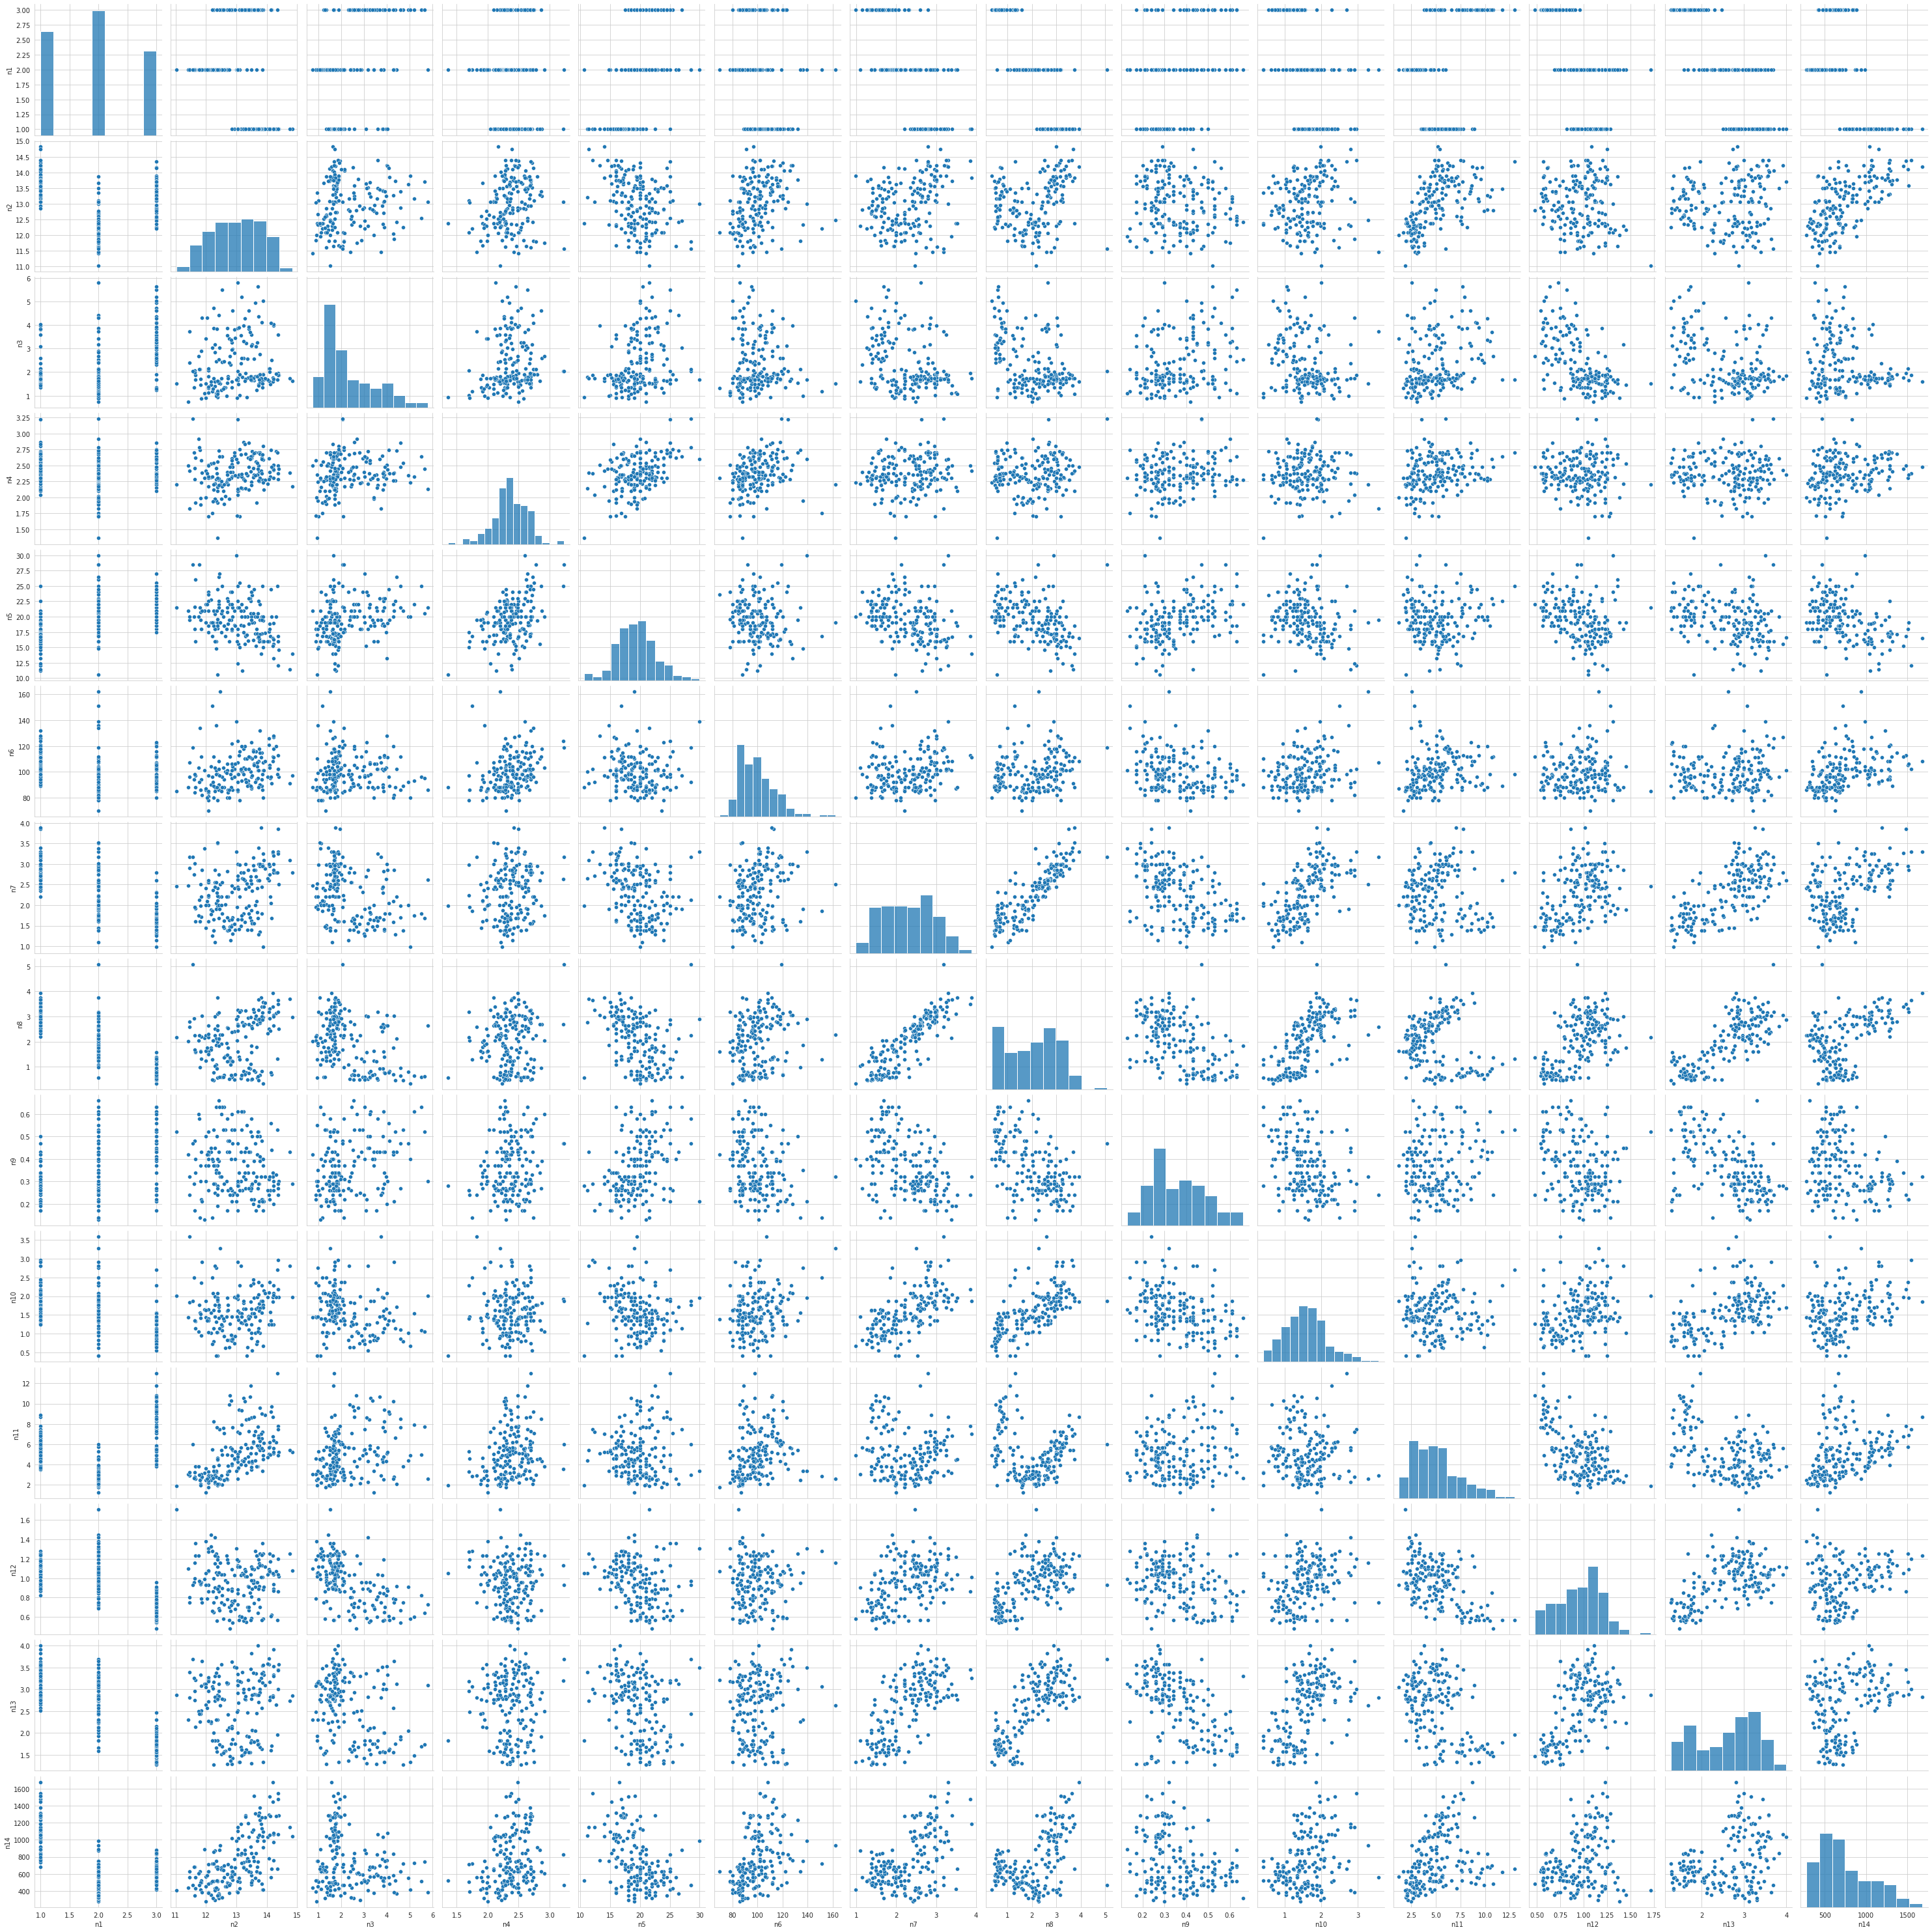

In [34]:
sns.set_style("whitegrid")
sns.pairplot(wine,size=3);
plt.show()

In [35]:
sns.set_style("whitegrid")
sns.pairplot(wine, hue = "n1",size=3);
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 5)
y_kmeans = kmeans.fit_predict(x)

In [37]:
print("Predicted Class labels :- ")
print(kmeans.labels_)

Predicted Class labels :- 
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 2 3 3 3 3 3 3 3 3 2 2 3
 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 0
 3 3 3 3 3 3 3 0 0 3 3 0 0 0 3 3 3 3 0 3 1 1 1 3 1 0 0 1 1 1 1 1 0 0 1 0 0
 1 0 1 1 1 1 3 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0]


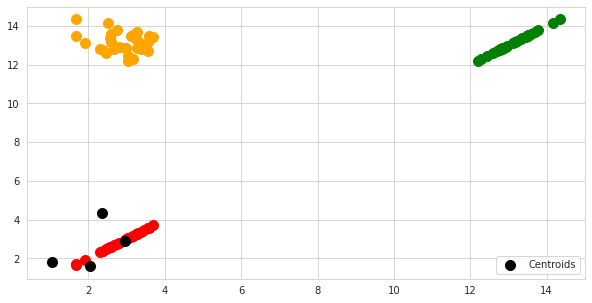

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 2], s = 100, c = 'red')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 1], s = 100, c = 'orange')
plt.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 1, 1], s = 100, c = 'green')

#Plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s = 100, c = 'black', label = 'Centroids')

plt.legend()